In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
pd.set_option('display.max_columns', 500)
data = pd.read_csv("Datasets/Customer_Personality_Analysis/data.csv", sep='\t')
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [116]:
data.shape

(2240, 29)

In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [118]:
num_categories = [feature for feature in data.columns if data[feature].dtype != "O"]
print(data[num_categories].isnull().sum())

ID                      0
Year_Birth              0
Income                 24
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


In [119]:
data = data.dropna()

In [120]:
data["Income"] = data["Income"].astype("int")

In [121]:
cat_categories = [feature for feature in data.columns if data[feature].dtype == "O"]
data[cat_categories].isnull().sum()

Education         0
Marital_Status    0
Dt_Customer       0
dtype: int64

In [122]:
data["total_spending"] = data["MntWines"] + data["MntFruits"] + data["MntMeatProducts"] + data["MntFishProducts"] + data["MntSweetProducts"] + data["MntGoldProds"]
data["total_number_of_children"] = data["Kidhome"] + data["Teenhome"]

data['Marital_Status'] = data['Marital_Status'].replace(['Married', 'Together'],'relationship')
data['Marital_Status'] = data['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'],'Single')

data["total_number_of_purches"] = data["NumDealsPurchases"] + data["NumWebPurchases"] + data["NumCatalogPurchases"] + data["NumStorePurchases"]

data['Age']=2014-data['Year_Birth']
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,total_spending,total_number_of_children,total_number_of_purches,Age
0,5524,1957,Graduation,Single,58138,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,1617,0,25,57
1,2174,1954,Graduation,Single,46344,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,27,2,6,60
2,4141,1965,Graduation,relationship,71613,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,776,0,21,49
3,6182,1984,Graduation,relationship,26646,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,53,1,8,30
4,5324,1981,PhD,relationship,58293,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,422,1,19,33


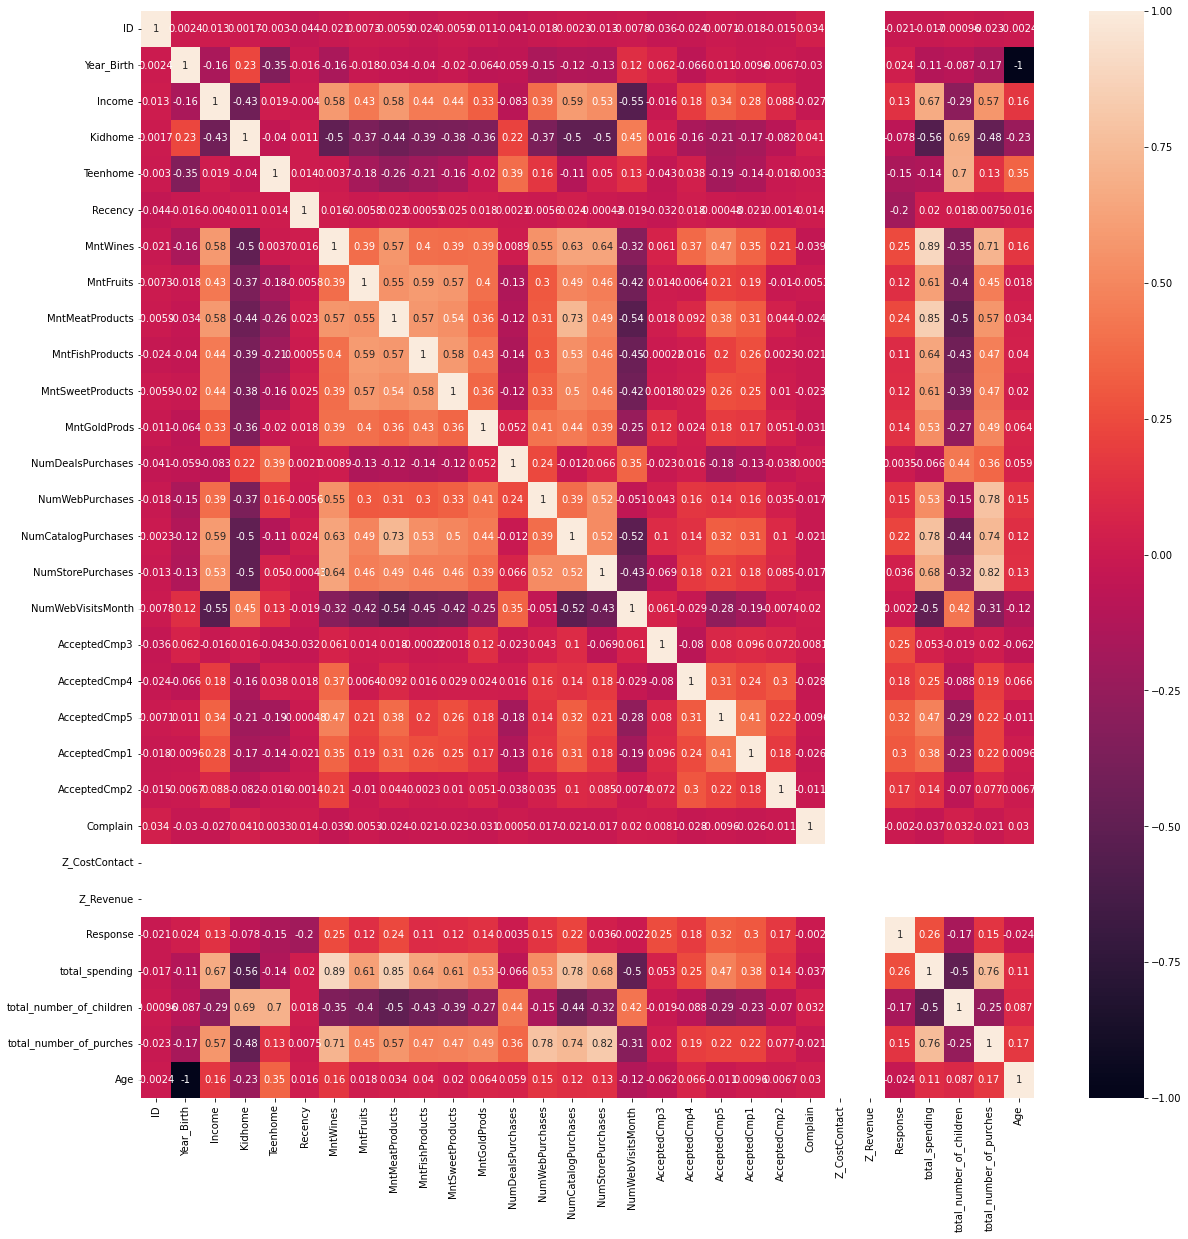

In [123]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [124]:
# Number of days a customer was engaged with company

# Changing Dt_customer into timestamp format
data['Dt_Customer'] = pd.to_datetime(data.Dt_Customer)
data['first_day'] = '01-01-2015'
data['first_day'] = pd.to_datetime(data.first_day)
data['day_engaged'] = (data['first_day'] - data['Dt_Customer']).dt.days

In [125]:
data = data[["Dt_Customer", "Age", "Marital_Status", "total_number_of_children", "Income", "total_spending", "day_engaged", "total_number_of_purches", "NumDealsPurchases"]]
data.head()

,Dt_Customer,Age,Marital_Status,total_number_of_children,Income,total_spending,day_engaged,total_number_of_purches,NumDealsPurchases
0,2012-04-09,57,Single,0,58138,1617,997,25,3
1,2014-08-03,60,Single,2,46344,27,151,6,2
2,2013-08-21,49,relationship,0,71613,776,498,21,1
3,2014-10-02,30,relationship,1,26646,53,91,8,2
4,2014-01-19,33,relationship,1,58293,422,347,19,5


In [126]:
#backup_data = data.to_csv("Backup_datasets/Custommer_Personality_Analysis.csv")
backup_data = data.copy()

In [127]:
data.describe()

,Age,total_number_of_children,Income,total_spending,day_engaged,total_number_of_purches,NumDealsPurchases
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,45.179603,0.947202,52247.251354,607.075361,538.006318,14.880866,2.323556
std,11.985554,0.749062,25173.076661,602.900476,232.469034,7.670957,1.923716
min,18.000000,0.000000,1730.000000,5.000000,26.000000,0.000000,0.000000
25%,37.000000,0.000000,35303.000000,69.000000,366.000000,8.000000,1.000000
50%,44.000000,1.000000,51381.500000,396.500000,539.000000,15.000000,2.000000
75%,55.000000,1.000000,68522.000000,1048.000000,712.000000,21.000000,3.000000
max,121.000000,3.000000,666666.000000,2525.000000,1089.000000,44.000000,15.000000


In [128]:
data = data[data['Income']<600000]